In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [40]:
df = pd.read_csv(r"D:\Rohini Personal\Data Analysis\Projects Datasets\Machine_Learning\housing_prices_dataset.csv")

In [41]:
df.head()

,Location,Size_sqft,Bedrooms,Bathrooms,Year_Built,Lot_Size_acres,Condition,Garage,Nearby_Schools,Price
0,Suburb,2424,4,3,1951,0.53,Good,0,2,257314.407240
1,Countryside,3572,3,3,1980,0.86,Good,1,3,418781.522098
2,Downtown,3936,5,1,1960,0.88,Good,1,2,365970.412592
3,Countryside,3947,4,1,1995,1.96,Fair,0,4,438392.307741
4,Countryside,1510,3,3,2011,0.44,Fair,1,1,230104.829071


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        1000 non-null   object 
 1   Size_sqft       1000 non-null   int64  
 2   Bedrooms        1000 non-null   int64  
 3   Bathrooms       1000 non-null   int64  
 4   Year_Built      1000 non-null   int64  
 5   Lot_Size_acres  1000 non-null   float64
 6   Condition       1000 non-null   object 
 7   Garage          1000 non-null   int64  
 8   Nearby_Schools  1000 non-null   int64  
 9   Price           1000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB


In [43]:
df['Condition'].unique()

array(['Good', 'Fair', 'Excellent', 'Poor'], dtype=object)

In [44]:
df['Location'].unique()

array(['Suburb', 'Countryside', 'Downtown'], dtype=object)

In [45]:
#one Hot Encoding 
encoded_location = pd.get_dummies(df['Location'],prefix = 'Location',dtype = int)
df = pd.concat([df,encoded_location], axis=1)
df.drop('Location', axis=1, inplace=True)

In [50]:
df.head(3)

,Size_sqft,Bedrooms,Bathrooms,Year_Built,Lot_Size_acres,Condition,Garage,Nearby_Schools,Price,Location_Countryside,Location_Downtown,Location_Suburb,Condition2
0,-0.015861,0.672439,1.201794,-1.678834,-0.952673,0.398387,0,0.060921,257314.407240,0,0,1,2
1,1.227941,-0.031686,1.201794,-0.278719,-0.347242,0.398387,1,0.761158,418781.522098,1,0,0,2
2,1.622317,1.376564,-1.230987,-1.244316,-0.310549,0.398387,1,0.060921,365970.412592,0,1,0,2


In [48]:
#Label Encoding
from sklearn.pareprocessing import LabelEncoder
# Define the custom order for 'Condition'
condition_order = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}

# Map the values in 'Condition' according to the custom order
df['Condition'] = df['Condition'].map(condition_order)

In [49]:
#Feature Scaling
numerical_col = ['Size_sqft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Lot_Size_acres', 'Nearby_Schools','Condition']
scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [51]:
#Define Feature and Target Variable
X = df.drop('Price',axis = 1) #Features
Y = df['Price'] #Target Variable

In [52]:
#Split into train and test data(80%: Train, 20%: Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
#Trainingthe model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [60]:
#Test theperformance of model using test data
Y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate R-squared value
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 28881.69566440968
R-squared (R2): 0.8010156395205392


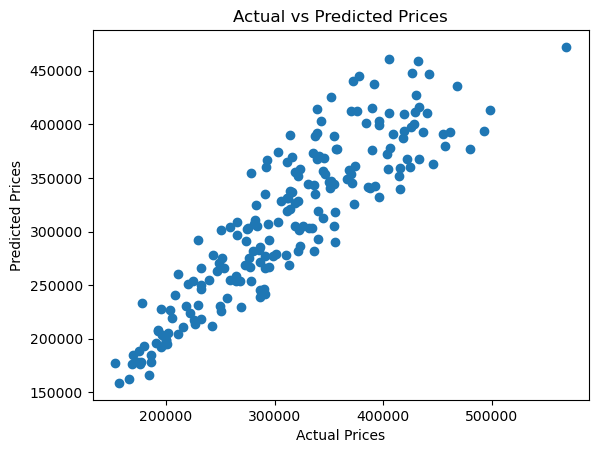

In [61]:
# Plotting the predicted vs actual prices
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [66]:
# Create a DataFrame with the actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': Y_test,
    'Predicted Price': Y_pred
})

# Display the table
comparison_df # Shows the first 5 rows of the table


,Actual Price,Predicted Price
521,409104.607927,390740.286221
737,178209.147623,233249.255055
740,310119.753433,278173.325284
660,352287.849543,425381.264253
411,356379.148667,376874.483960
...,...,...
408,315782.175173,369636.426587
332,337599.411061,389013.468828
208,199034.261732,195539.460390
613,200468.977926,198519.384347
